## Observations and Insights 

#### Importing modules, libraries and cleaning the raw data

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Opening data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Reading the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combining the data into a single dataset

combined_results = pd.merge(mouse_metadata,study_results, on="Mouse ID", how="outer")
combined_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
combined_results["Mouse ID"].count()

1893

In [3]:
#Checking columns variable types.
combined_results.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_results.loc[combined_results.duplicated(["Mouse ID","Timepoint"])]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df= combined_results.drop_duplicates(["Mouse ID","Timepoint"],keep=False)
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df["Mouse ID"].count()


1883

## Summary Statistics

#### Statistics summary(mean, median, variance, standard deviation and SEM) of the tumor volume for each durg regimen

##### Method 1: creating multiple series and putting them all together at the end

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.
drug_regimen= clean_mouse_df.groupby("Drug Regimen")
drug_regimen["Tumor Volume (mm3)"].count()
drug_regimen_mean= drug_regimen["Tumor Volume (mm3)"].mean()
drug_regimen_median= drug_regimen["Tumor Volume (mm3)"].median()
drug_regimen_var= drug_regimen["Tumor Volume (mm3)"].var()
drug_regimen_std= drug_regimen["Tumor Volume (mm3)"].std()
drug_regimen_sem= drug_regimen["Tumor Volume (mm3)"].sem()

drug_regimen_stats = drug_regimen.agg(Mean=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="mean"),
                                      Median=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="median"),
                                      Variance=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="var"),
                                      St_Deviation=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="std"),
                                      Sem=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="sem"))                                                                                                                              
drug_regimen_stats

,Mean,Median,Variance,St_Deviation,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


##### Method 2: single line

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
statistics_mouse= clean_mouse_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").agg(["mean","median","var","std","sem"])


stats_mouse_df = statistics_mouse.rename(columns = {"mean":"Mean","median":"Median",
                                                    "var":"Variance", "std":"St_Deviation","sem":"Sem"})
stats_mouse_df

Tumor Volume (mm3)                                             
                           Mean     Median   Variance St_Deviation       Sem
Drug Regimen                                                                
Capomulin             40.675741  41.557809  24.947764     4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177     6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684     6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577     8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479     8.134708  0.596466
Placebo               54.033581  52.288934  61.168083     7.821003  0.581331
Propriva              52.458254  50.854632  44.053659     6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704     4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562     7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355     6.966589  0.516398

## Bar Plots
#### Number of mice per time point for each treatment throughout the course of the study

##### Method 1: Pandas

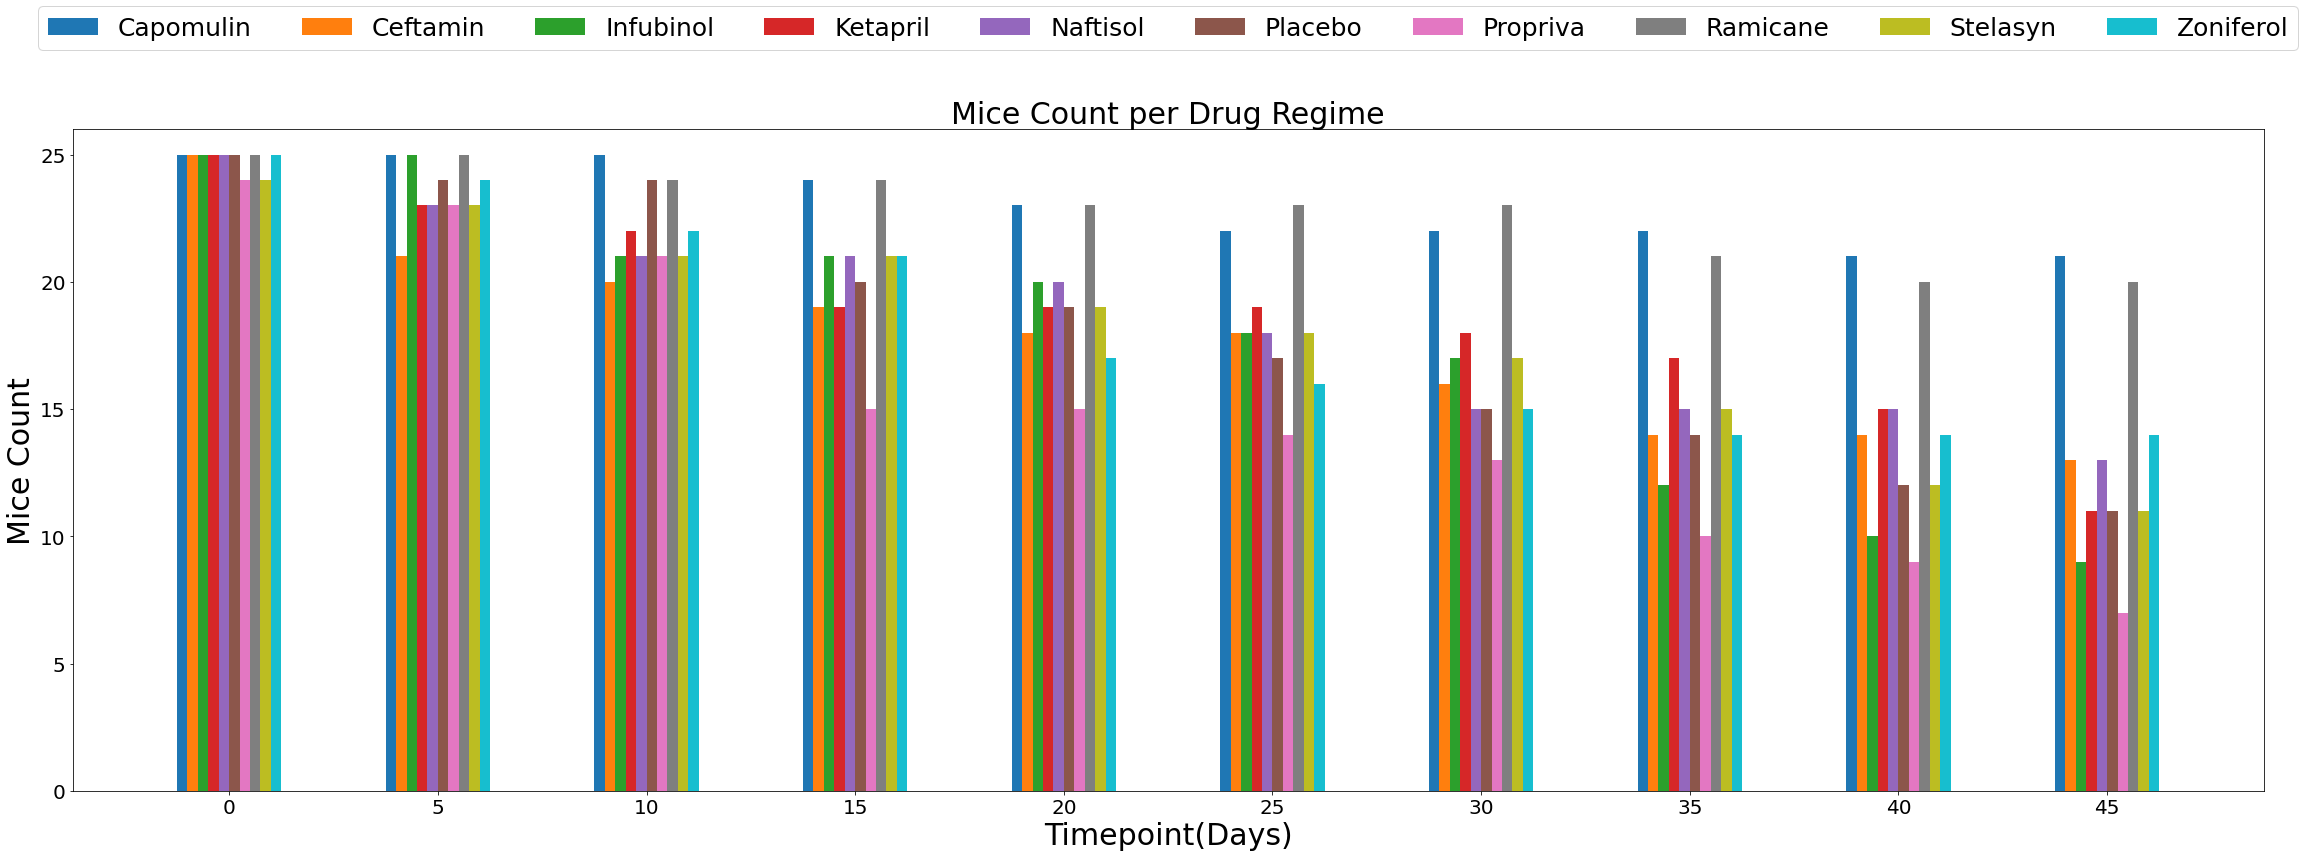

In [70]:
#Grouping by Drug Regimen and Timepoint, and calculating the mice count

mice_bar_analysis = clean_mouse_df.groupby(["Drug Regimen","Timepoint"])
mice_bar_counts_df = mice_bar_analysis.agg(Mouse_Count=pd.NamedAgg(column="Mouse ID", aggfunc="count"))

# Generating the bar plot with pandas
mice_bar_counts_df.unstack(0).plot(kind="bar",figsize=(35,12))
plt.legend(loc="lower center",bbox_to_anchor=(0.5,1.1),ncol=10,fancybox=True,fontsize=25,labels=labels)
plt.title("Mice Count per Drug Regime",fontsize=30)
plt.ylabel("Mice Count",fontsize=30)
plt.xlabel("Timepoint(Days)",fontsize=30)
plt.xlim(-0.75,len(mice_bar_counts_df)/10-0.25)
#Assigning ticks to the x axis
labels= mice_bar_counts_df.index.get_level_values(0).unique()
unique_mice_count= mice_bar_counts_df["Mouse_Count"].unique()
plt.tick_params(axis="y",labelsize=20)
plt.tick_params(axis="x",labelsize=20,rotation=0)
plt.ylim(0,len(unique_mice_count)+8)
plt.tight_layout()
plt.show()

##### Method 2: Matplotlib "Pyplot"

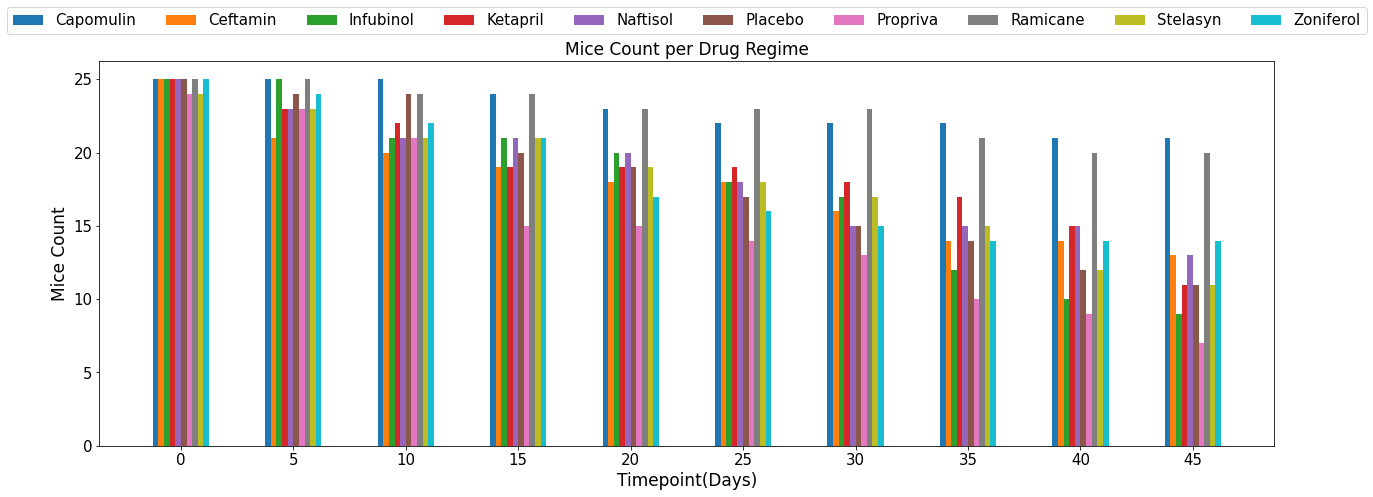

In [73]:
#filterig source data to plot
mice_bar_df= mice_bar_analysis["Mouse ID"].count()
mice_bar_df= mice_bar_df.reset_index()
labels= mice_bar_df["Timepoint"].unique()
regimens= mice_bar_df["Drug Regimen"].unique()
timepoints= mice_bar_df["Timepoint"].unique()
x = np.arange(len(timepoints))

# Empty dictionary to store mice count per timepoint for each regimen
d={}

for regimen in regimens:
     d[str(regimen)]=mice_bar_df.loc[mice_bar_df["Drug Regimen"]==regimen]["Mouse ID"]

#Defining x axis and labels

x = np.arange(len(timepoints)) 
labels = timepoints

# the width of the bars
width = 0.05

# Plotting all bars

fig, ax = plt.subplots(figsize=(20, 7))
w=0
for regimen in regimens:
    ax.bar(x+(-4.5+w)*width, d[str(regimen)],width, label=str(regimen))
    w+=1
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mice Count',fontsize=17)
ax.set_xlabel('Timepoint(Days)',fontsize=17)
ax.set_title('Mice Count per Drug Regime',fontsize=17)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=15)
ax.tick_params(axis="y",labelsize=15)
ax.legend(loc="lower center",bbox_to_anchor=(0.5,1.05),ncol=10,fancybox=True,fontsize=15)
fig.tight_layout()
plt.show()
    

## Pie Plots
#### Distribution of female or male mice in the study.

##### Method 1: Pandas

In [74]:
#distribution of female versus male mice
sex_distribution= clean_mouse_df.groupby("Sex")
mice_gender= sex_distribution["Mouse ID"].count()
mice_gender_df= mice_gender.reset_index()
gender_list= list(mice_gender_df["Sex"])
mice_gender_df

,Sex,Mouse ID
0,Female,925
1,Male,958


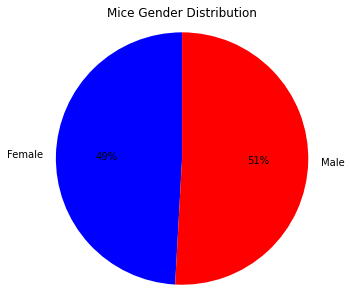

<Figure size 432x288 with 0 Axes>

In [75]:
# Generate the pie plot with pandas
gender_pie= mice_gender.plot.pie(y="Mouse ID",autopct='%1.0f%%',startangle=90, radius=0.5, title="Mice Gender Distribution",
                            colors=["blue","red"],figsize=(5, 5))
gender_pie.set_ylabel(" ")
plt.axis("equal")
plt.show()
plt.tight_layout()

##### Method 2: Matplotlib "Pyplot"

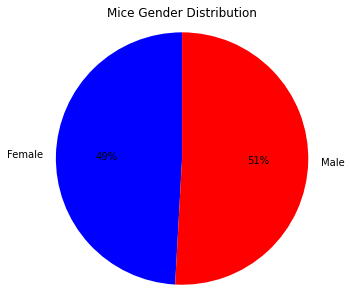

In [76]:
# Defining labels, yvalue, pie colors
labels=mice_gender_df["Sex"]
sizes= mice_gender_df["Mouse ID"]
colors=["blue","red"]

#Plotting

fig, ax = plt.subplots(figsize=(5,5))
ax.pie(sizes,labels=labels,colors=colors,autopct='%1.0f%%',startangle=90, radius=0.5)
ax.set(title='Mice Gender Distribution')
ax.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

#### The below analysis took in count only those mouses that lasted until day 45 of the study. Its risky to asume that the rest of the mices that don't appear at day 45 died , because we don't know the background of the study, and we cannot confirm this fact. However below you can see the results behaviour for the 63 mouses at day 45:

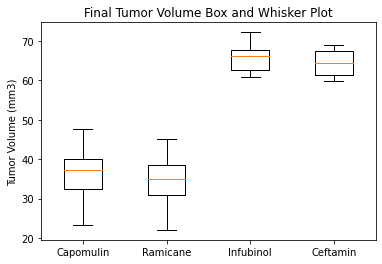

In [32]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
total_tumor_volume= clean_mouse_df.loc[(clean_mouse_df["Timepoint"]==45)&((clean_mouse_df["Drug Regimen"]=="Capomulin")|(clean_mouse_df["Drug Regimen"]=="Ramicane")\
                                                                         |(clean_mouse_df["Drug Regimen"]=="Infubinol")|(clean_mouse_df["Drug Regimen"]=="Ceftamin"))]

capomulin_box_df=total_tumor_volume.loc[(total_tumor_volume["Drug Regimen"]=="Capomulin")]
ramicane_box_df=total_tumor_volume.loc[(total_tumor_volume["Drug Regimen"]=="Ramicane")]
infubinol_box_df=total_tumor_volume.loc[(total_tumor_volume["Drug Regimen"]=="Infubinol")]
ceftamin_box_df=total_tumor_volume.loc[(total_tumor_volume["Drug Regimen"]=="Ceftamin")]

data = [capomulin_box_df["Tumor Volume (mm3)"],ramicane_box_df["Tumor Volume (mm3)"],infubinol_box_df["Tumor Volume (mm3)"],ceftamin_box_df["Tumor Volume (mm3)"]]
ticks= np.arange(1,len(total_tumor_volume["Drug Regimen"].unique())+1)
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume Box and Whisker Plot')
ax.boxplot(data)
ax.set_ylabel("Tumor Volume (mm3)")
plt.xticks(ticks,["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.show()

#### The real way through which the final tumor volume of each mouse across four of the most promising treatment regimens can be analized, is by picking the last "Timepoint" reported for each mice, even if there are mices that only has data for "0 Days":

In [33]:
# Sorting the initial dataset, dropping duplicated values, but keeping the last one(45 days)
tumor_total=clean_mouse_df.sort_values("Timepoint").drop_duplicates(subset=["Mouse ID"],keep="last")
tumor= tumor_total.loc[(tumor_total["Drug Regimen"]=="Capomulin")|(tumor_total["Drug Regimen"]=="Ramicane")\
                                                                         |(tumor_total["Drug Regimen"]=="Infubinol")|(tumor_total["Drug Regimen"]=="Ceftamin"),:]
#Calculating a DataFrame to calculate by a "Quantitative" way the IQR and possible outliers
promise_regimens=list(tumor["Drug Regimen"].unique())
a={}
for reg in promise_regimens:
    a[str(reg)]= tumor.loc[(tumor["Drug Regimen"]==reg)]["Tumor Volume (mm3)"].quantile([.25,.5,.75]).to_dict()
mice_quartiles_df= pd.DataFrame.from_dict({(i): a[i]
                       for i in a.keys()} ,orient="index")

mice_quartiles_df=mice_quartiles_df.rename(columns={0.25:"Lowerq",0.50:"Median",0.75:"Upperq"})
mice_quartiles_df["IQR"]=mice_quartiles_df["Upperq"]- mice_quartiles_df["Lowerq"]
mice_quartiles_df["Lower Bound"]=mice_quartiles_df["Lowerq"]-(1.5*mice_quartiles_df["IQR"])
mice_quartiles_df["Upper Bound"]=mice_quartiles_df["Upperq"]+(1.5*mice_quartiles_df["IQR"])
mice_quartiles_df

,Lowerq,Median,Upperq,IQR,Lower Bound,Upper Bound
Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458
Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811
Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446
Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015


In [52]:
print(f"For {promise_regimens[0]} values greater than {round(mice_quartiles_df.iloc[0,5],2)} (mm3) or less than {round(mice_quartiles_df.iloc[0,4],2)} (mm3) could be treated as outliers")
print(f"For {promise_regimens[1]} values greater than {round(mice_quartiles_df.iloc[1,5],2)} (mm3) or less than {round(mice_quartiles_df.iloc[1,4],2)} (mm3) could be treated as outliers")
print(f"For {promise_regimens[2]} values greater than {round(mice_quartiles_df.iloc[2,5],2)} (mm3) or less than {round(mice_quartiles_df.iloc[2,4],2)} (mm3) could be treated as outliers")
print(f"For {promise_regimens[3]} values greater than {round(mice_quartiles_df.iloc[3,5],2)} (mm3) or less than {round(mice_quartiles_df.iloc[3,4],2)} (mm3) could be treated as outliers")

For Ceftamin values greater than 87.67 (mm3) or less than 25.36 (mm3) could be treated as outliers
For Ramicane values greater than 54.31 (mm3) or less than 17.91 (mm3) could be treated as outliers
For Infubinol values greater than 82.74 (mm3) or less than 36.83 (mm3) could be treated as outliers
For Capomulin values greater than 51.83 (mm3) or less than 20.7 (mm3) could be treated as outliers


#### Now graphycally representing possible outliers, generating a Box and Whisker Plot, it can be seen that for "Infubinol" drug regimen, there is one outlier that is less than 36.83(mm3):

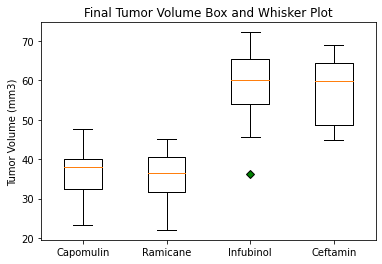

In [38]:
#Generating a mutliple box plot for the four most promising drug regimens:

#Filtering drug regimen from the last tumor volumen 
capomulin_box=tumor.loc[(tumor["Drug Regimen"]=="Capomulin")]["Tumor Volume (mm3)"]
ramicane_box=tumor.loc[(tumor["Drug Regimen"]=="Ramicane")]["Tumor Volume (mm3)"]
infubinol_box=tumor.loc[(tumor["Drug Regimen"]=="Infubinol")]["Tumor Volume (mm3)"]
ceftamin_box=tumor.loc[(tumor["Drug Regimen"]=="Ceftamin")]["Tumor Volume (mm3)"]

#Generating one plot for all four regimens
green_diamond = dict(markerfacecolor='g', marker='D')
data = [capomulin_box,ramicane_box,infubinol_box,ceftamin_box]
ticks_2= np.arange(1,len(total_tumor_volume["Drug Regimen"].unique())+1)
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume Box and Whisker Plot')
ax.boxplot(data,flierprops=green_diamond)
ax.set_ylabel("Tumor Volume (mm3)")
plt.xticks(ticks,["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.show()

## Line and Scatter Plots

#### In this part of the analysis, a line plot was generated to see time point versus tumor volume for a single mouse treated with Capomulin. Mice with ID "s185" was selected:

<function matplotlib.pyplot.show(*args, **kw)>

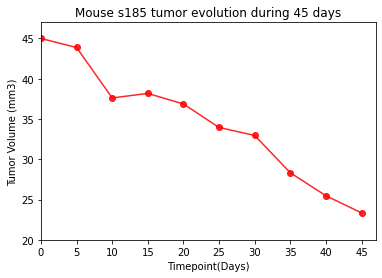

In [58]:
# Selecting a mice id from Capomulin drug regimen data

mice_line=clean_mouse_df.set_index("Mouse ID")
mice_line= mice_line.loc[mice_line["Drug Regimen"]=="Capomulin"]
mice= "s185"
single_mice=mice_line.loc[mice]

# Plotting
plt.plot(single_mice["Timepoint"],single_mice["Tumor Volume (mm3)"],marker="o",color="red",alpha=0.85)
plt.xlabel("Timepoint(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0,47)
plt.ylim(20,47)
plt.xticks(list(single_mice["Timepoint"]))
plt.title("Mouse " + (mice) + " tumor evolution during 45 days")
plt.show

#### Creating a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen:

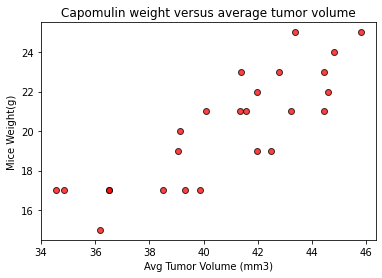

In [63]:
#Grouping by "Capomulin" treatment and generated a new dataframe with the Tumor Volume average.

mouse_scatter=clean_mouse_df.loc[clean_mouse_df["Drug Regimen"]=="Capomulin",:]
scatter_analysis=mouse_scatter.groupby("Mouse ID")
mice_scatter_plot =scatter_analysis.agg(Avg_Tumor_Volume=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="mean"),
                                       Weight=pd.NamedAgg(column="Weight (g)", aggfunc="mean"))

#Plotting the scatter chart

plt.scatter(mice_scatter_plot["Avg_Tumor_Volume"],mice_scatter_plot["Weight"],facecolor="red",marker="o",edgecolor="black",alpha=0.75)
plt.title("Capomulin weight versus average tumor volume")
plt.xlabel("Avg Tumor Volume (mm3)")
plt.ylabel("Mice Weight(g)")
plt.show()




## Correlation and Linear Regression Model
#### Mouse weight and average tumor calculation for the Capomulin drug regimen

In [29]:
#Correlation coefficient calculation
corr=st.pearsonr(mice_scatter_plot["Avg_Tumor_Volume"],mice_scatter_plot["Weight"])
corr_factor = (round(corr[0],2))
print(f" The correlation coefficient for mouse weight and average tumor volume for the Capomulin Regimen is {corr_factor}")


 The correlation coefficient for mouse weight and average tumor volume for the Capomulin Regimen is 0.84


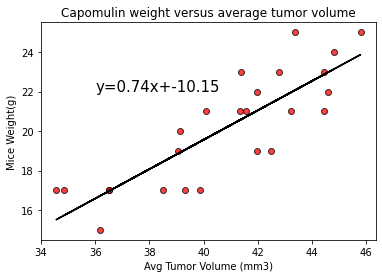

The r-squared is: 0.7088568047708717


In [64]:
#Plotting scatter chart, line curve, line equation
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(mice_scatter_plot["Avg_Tumor_Volume"],mice_scatter_plot["Weight"])
regress_values= mice_scatter_plot["Avg_Tumor_Volume"] * slope + intercept
line_eq= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.scatter(mice_scatter_plot["Avg_Tumor_Volume"],mice_scatter_plot["Weight"],facecolor="red",marker="o",edgecolor="black",alpha=0.75)
plt.plot(mice_scatter_plot["Avg_Tumor_Volume"],regress_values,"r-",color="black")
plt.annotate(line_eq,(36,22),fontsize=15,color="black")
plt.title("Capomulin weight versus average tumor volume")
plt.xlabel("Avg Tumor Volume (mm3)")
plt.ylabel("Mice Weight(g)")
plt.show()

# printing the r-squared factor

print(f"The r-squared is: {rvalue**2}")